In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact, fixed,interactive, fixed, interact_manual

In [2]:
path = r"C:\Users\Administrator\Documents\dataset\Muskets_teamData_V2.csv"

In [3]:
#load the dataset into a dataframe
df = pd.read_csv(path)

#peeking on the data
df.head(20)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91.0,91.0,\n\n\n\nFC Bayern München,...,High,Medium,4 ★,78.0,91.0,78.0,85.0,43.0,82.0,248
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90.0,90.0,\n\n\n\nLiverpool,...,High,Medium,3 ★,93.0,86.0,81.0,90.0,45.0,75.0,246
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90.0,91.0,\n\n\n\nLiverpool,...,Medium,Medium,3 ★,86.0,88.0,85.0,89.0,51.0,91.0,120
8,231747,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/21_60.png,http://sofifa.com/player/231747/kylian-mbappe/...,France,21,90.0,95.0,\n\n\n\nParis Saint-Germain,...,High,Low,3 ★,96.0,86.0,78.0,91.0,39.0,76.0,1.6K
9,192448,M. ter Stegen,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/21_60.png,http://sofifa.com/player/192448/marc-andre-ter...,Germany,28,90.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Medium,3 ★,88.0,85.0,88.0,90.0,45.0,88.0,130


In [4]:
PlayerName = df.playerUrl.str.split('/', expand= True)[5].apply(lambda x: x.replace('-', ' ').title())
df['PlayerName'] = PlayerName
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,PlayerName
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,Lionel Messi
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,C Ronaldo Dos Santos Aveiro
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,Jan Oblak
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,Kevin De Bruyne
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,Neymar Da Silva Santos Jr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN,Ao Xia
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN,Ben Hough
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN,Ronan Mckinley
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN,Zhenao Wang


## Reforming the Data

In [5]:
df.shape

(19021, 78)

In [6]:
df2 = df.copy()

In [7]:
#Create a new column titled Player Status from the CONTRACT column with 3 labels ; 'Active','Free', 'On Loan'
Status = []
for i in df2['Contract']:
    if 'Free' in i:
        Status.append('Free')
    elif 'On Loan' in i:
        Status.append('On Loan')
    else:
        Status.append('Active')
df2['Player Status'] = Status

    

In [8]:
df2.head(20)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,PlayerName,Player Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,Lionel Messi,Active
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,C Ronaldo Dos Santos Aveiro,Active
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,Jan Oblak,Active
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,Kevin De Bruyne,Active
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,Neymar Da Silva Santos Jr,Active
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91.0,91.0,\n\n\n\nFC Bayern München,...,4 ★,78.0,91.0,78.0,85.0,43.0,82.0,248,Robert Lewandowski,Active
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90.0,90.0,\n\n\n\nLiverpool,...,3 ★,93.0,86.0,81.0,90.0,45.0,75.0,246,Mohamed Salah,Active
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90.0,91.0,\n\n\n\nLiverpool,...,3 ★,86.0,88.0,85.0,89.0,51.0,91.0,120,Alisson Ramses Becker,Active
8,231747,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/21_60.png,http://sofifa.com/player/231747/kylian-mbappe/...,France,21,90.0,95.0,\n\n\n\nParis Saint-Germain,...,3 ★,96.0,86.0,78.0,91.0,39.0,76.0,1.6K,Kylian Mbappe,Active
9,192448,M. ter Stegen,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/21_60.png,http://sofifa.com/player/192448/marc-andre-ter...,Germany,28,90.0,93.0,\n\n\n\nFC Barcelona,...,3 ★,88.0,85.0,88.0,90.0,45.0,88.0,130,Marc Andre Ter Stegen,Active


In [9]:
#convert the rows into a set of unique values
position = [pos.split(',') for pos in df2.Positions.values]
position = [item.strip() for sublist in position for item in sublist]
position = set(position)
print("unique values", position)

print('----------------------------------------------------------------------------------------------------------------')
#create new columns using the set of unique value
for i in position:
    df2[i] = np.nan
df2

unique values {'CM', 'LW', 'RWB', 'LWB', 'LM', 'CAM', 'CF', 'GK', 'RW', 'CB', 'RM', 'CDM', 'RB', 'LB', 'ST'}
----------------------------------------------------------------------------------------------------------------


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,CAM,CF,GK,RW,CB,RM,CDM,RB,LB,ST
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Removing \n\n\n\n from Club column
df2.loc[df2['Club'].str.contains('\n\n\n\n'), 'Club'] = df2['Club'].str.replace('\n\n\n\n', '')

In [11]:
df2

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,CAM,CF,GK,RW,CB,RM,CDM,RB,LB,ST
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,Juventus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,Manchester City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,Paris Saint-Germain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,Wuhan Zall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,Oldham Athletic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,Derry City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,Dalian YiFang FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#iterate through each Position column and validate if unique value is present, if present ascribe True else False
posi = ['LWB', 'RW', 'LW', 'RB', 'CM', 'CF', 'CB', 'LM', 'CAM','RWB', 'LB', 'GK', 'ST', 'CDM', 'RM']
for u in posi:
    df2[u] = df2.Positions.apply(lambda x: u in x)
df2[posi] = df2[posi].fillna(False)
df2[posi].head(10)

,LWB,RW,LW,RB,CM,CF,CB,LM,CAM,RWB,LB,GK,ST,CDM,RM
0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [13]:
df2.Positions

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [15]:
df2['Height'] = df2['Height'].map(lambda x: x[:-2].strip())
df2['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       "6'", '164', '198', "5'1", "5'", '201', '158', '162', '161', '160',
       '203', '157', '156', '202', '159', '206', '155'], dtype=object)

In [16]:
df2['Height'].replace(["6'", "5'1", "5'"], ["183", '155', '152'], inplace=True)
df2['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '164', '198', '155', '152', '201', '158', '162', '161', '160',
       '203', '157', '156', '202', '159', '206'], dtype=object)

In [17]:
df2['Height'] = df2['Height'].astype(int)
df2['Height'].dtype

dtype('int32')

In [18]:
df2['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [19]:
df2['Weight'].replace(['179lbs', '183lbs', '196lbs', '170lbs', '172lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '174lbs',
       '148lbs', '165lbs', '192lbs', '181lbs', '139lbs', '154lbs',
       '157lbs', '163lbs','176lbs', '185lbs', '190lbs', '159lbs', np.nan], ['81kg', '83kg', '89kg', 
                                                                    '77kg','78kg', '92kg', 
                                                                    '76kg', '73kg', '66kg', 
                                                                    '59kg', '79kg', '67kg',
                                                                    '75kg','87kg', '82kg', 
                                                                    '63kg', '70kg', '71kg', 
                                                                    '74kg', '80kg', '84kg', 
                                                                    '86kg', '72kg','0kg'], inplace=True)

In [20]:
df2['Weight'] = df2['Weight'].astype(str)
df2['Weight'] = df2['Weight'].apply(lambda x:x[:-2])
df2['Weight'].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '0', '58', '98', '103',
       '99', '102', '56', '101', '57', '55', '104', '107', '110', '53',
       '50', '54', '52'], dtype=object)

In [21]:
df2['Weight'] = df2['Weight'].astype(int)
df2['Weight'].dtype

dtype('int32')

In [22]:
df2['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [23]:
df2['W/F'].replace(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'],[4,3,5,2,1], inplace=True)
df2['W/F'].astype(int)
df2['W/F'].dtype

dtype('int64')

In [24]:
df2['SM'].unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [25]:
df2['SM'].replace(['4★', '1★', '5★', '2★', '3★'],[4,1,5,2,3], inplace=True)
df2['SM'].astype(int)
df2['SM'].dtype

dtype('int64')

In [26]:
df2['IR'].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [27]:
df2['IR'].replace(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'],[5,3,4,2,1], inplace=True)
df2['IR'].astype(int)
df2['IR'].dtype

dtype('int64')

In [28]:
df2['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [29]:
df2.Value = df2.Value.map(lambda x: float(x[1:-1])*10**6 if 'M' in x else x)
df2.Value = df2.Value.astype(str)
df2.Value = df2.Value.map(lambda x:x[1:-1] if 'K' in x else x)
df2.Value.unique()

array(['103500000.0', '63000000.0', '120000000.0', '129000000.0',
       '132000000.0', '111000000.0', '120500000.0', '102000000.0',
       '185500000.0', '110000000.0', '113000000.0', '90500000.0',
       '82000000.0', '17500000.0', '83500000.0', '33500000.0',
       '114500000.0', '78000000.0', '103000000.0', '109000000.0',
       '92000000.0', '10000000.0', '76500000.0', '89500000.0',
       '87500000.0', '79500000.0', '124000000.0', '114000000.0',
       '95000000.0', '92500000.0', '105500000.0', '88500000.0',
       '85000000.0', '81500000.0', '26000000.0', '21000000.0',
       '56000000.0', '67500000.0', '53000000.0', '36500000.0',
       '51000000.0', '65500000.0', '46500000.0', '61500000.0',
       '72500000.0', '77500000.0', '43500000.0', '32500000.0',
       '36000000.0', '32000000.0', '54000000.0', '49500000.0',
       '57000000.0', '66500000.0', '74500000.0', '71500000.0',
       '121000000.0', '99000000.0', '67000000.0', '86500000.0',
       '93500000.0', '70000000.0', '62

In [30]:
df2.Value.replace('€0', '0', inplace=True)
df2.Value = df2.Value.astype('float32')
df2.Value.dtype

dtype('float32')

In [31]:
df2['Wage'].unique() 

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [32]:
df2.Wage = df2.Wage.map(lambda x: float(x[1:-1])*10**3 if 'K' in x else x)
df2.Wage.unique()

array([560000.0, 220000.0, 125000.0, 370000.0, 270000.0, 240000.0,
       250000.0, 160000.0, 260000.0, 210000.0, 310000.0, 130000.0,
       350000.0, 300000.0, 190000.0, 145000.0, 195000.0, 100000.0,
       140000.0, 290000.0, 82000.0, 110000.0, 230000.0, 155000.0,
       200000.0, 165000.0, 95000.0, 170000.0, 105000.0, 115000.0,
       150000.0, 135000.0, 55000.0, 58000.0, 81000.0, 34000.0, 120000.0,
       59000.0, 90000.0, 65000.0, 56000.0, 71000.0, 18000.0, 75000.0,
       47000.0, 20000.0, 84000.0, 86000.0, 74000.0, 78000.0, 27000.0,
       68000.0, 85000.0, 25000.0, 46000.0, 83000.0, 54000.0, 79000.0,
       175000.0, 43000.0, 49000.0, 45000.0, 38000.0, 41000.0, 39000.0,
       23000.0, 51000.0, 50000.0, 87000.0, 30000.0, 14000.0, 69000.0,
       31000.0, 64000.0, 53000.0, 35000.0, 21000.0, 28000.0, 17000.0,
       33000.0, 70000.0, 32000.0, 89000.0, 26000.0, 40000.0, 76000.0,
       72000.0, 48000.0, 36000.0, 29000.0, 60000.0, 16000.0, 37000.0,
       24000.0, 52000.0, '€0', 62

In [33]:
df2.Wage = df2.Wage.astype('str')
df2.Wage

0        560000.0
1        220000.0
2        125000.0
3        370000.0
4        270000.0
           ...   
19016      1000.0
19017        €500
19018        €500
19019      2000.0
19020      1000.0
Name: Wage, Length: 19021, dtype: object

In [34]:
df2.Wage = df2.Wage.map(lambda x: x[1:] if '€' in x else x)
df2.Wage.unique()

array(['560000.0', '220000.0', '125000.0', '370000.0', '270000.0',
       '240000.0', '250000.0', '160000.0', '260000.0', '210000.0',
       '310000.0', '130000.0', '350000.0', '300000.0', '190000.0',
       '145000.0', '195000.0', '100000.0', '140000.0', '290000.0',
       '82000.0', '110000.0', '230000.0', '155000.0', '200000.0',
       '165000.0', '95000.0', '170000.0', '105000.0', '115000.0',
       '150000.0', '135000.0', '55000.0', '58000.0', '81000.0', '34000.0',
       '120000.0', '59000.0', '90000.0', '65000.0', '56000.0', '71000.0',
       '18000.0', '75000.0', '47000.0', '20000.0', '84000.0', '86000.0',
       '74000.0', '78000.0', '27000.0', '68000.0', '85000.0', '25000.0',
       '46000.0', '83000.0', '54000.0', '79000.0', '175000.0', '43000.0',
       '49000.0', '45000.0', '38000.0', '41000.0', '39000.0', '23000.0',
       '51000.0', '50000.0', '87000.0', '30000.0', '14000.0', '69000.0',
       '31000.0', '64000.0', '53000.0', '35000.0', '21000.0', '28000.0',
       '1700

In [35]:
df2.Wage = df2.Wage.astype('float32')
df2.Wage.dtype

dtype('float32')

In [36]:
clause = [v for v in df2['Release Clause'].unique()]
clause

['€138.4M',
 '€75.9M',
 '€159.4M',
 '€161M',
 '€166.5M',
 '€132M',
 '€144.3M',
 '€120.3M',
 '€203.1M',
 '€147.7M',
 '€145.3M',
 '€122M',
 '€119M',
 '€47.9M',
 '€108.7M',
 '€50.2M',
 '€98.1M',
 '€139.6M',
 '€96.9M',
 '€112.1M',
 '€122.5M',
 '€103M',
 '€140.2M',
 '€27.2M',
 '€85M',
 '€118.9M',
 '€112.8M',
 '€103.5M',
 '€132.1M',
 '€115.5M',
 '€102M',
 '€107.8M',
 '€124.4M',
 '€104.9M',
 '€99.8M',
 '€96.2M',
 '€50M',
 '€25.6M',
 '€77.9M',
 '€85.5M',
 '€56.1M',
 '€72.2M',
 '€64.6M',
 '€51.3M',
 '€82.5M',
 '€69.3M',
 '€59.9M',
 '€98.8M',
 '€96.3M',
 '€53.2M',
 '€43.1M',
 '€48.5M',
 '€47.3M',
 '€58.7M',
 '€65.6M',
 '€67.5M',
 '€84.7M',
 '€87M',
 '€95.8M',
 '€119.7M',
 '€91.6M',
 '€79M',
 '€111.3M',
 '€78.9M',
 '€81.9M',
 '€88.8M',
 '€86.9M',
 '€94.6M',
 '€69.4M',
 '€78M',
 '€97.8M',
 '€86.6M',
 '€107.3M',
 '€63.8M',
 '€54.2M',
 '€21.9M',
 '€66.2M',
 '€79.9M',
 '€52M',
 '€68.5M',
 '€56.4M',
 '€66.3M',
 '€44.2M',
 '€29.7M',
 '€40.8M',
 '€68.9M',
 '€24.7M',
 '€72.8M',
 '€57.8M',
 '€72.1M',
 '€7

In [37]:
len(clause)

1217

In [38]:
'€0' in clause

True

In [39]:
df2['Release Clause'] = df2['Release Clause'].astype(str)
df2['Release Clause'] = df2['Release Clause'].map(lambda x: round(float(x[1:-1])*10**6) if 'M' in x else x)
df2['Release Clause'].unique()

array([138400000, 75900000, 159400000, ..., '€59K', '€35K', '€64K'],
      dtype=object)

In [40]:
df2['Release Clause'] = df2['Release Clause'].astype(str)
df2['Release Clause'] = df2['Release Clause'].map(lambda x:x[1:-1] if 'K' in x else x)

In [41]:
df2['Release Clause'].unique()

array(['138400000', '75900000', '159400000', ..., '59', '35', '64'],
      dtype=object)

In [42]:
df2['Release Clause'].replace('€0', '0', inplace=True)
df2['Release Clause'] = df2['Release Clause'].astype('float32')

In [43]:
#Inspect the HITS column and ensure its float 
df2.Hits.dtype

dtype('O')

In [44]:
df2.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [45]:
df2['Hits'].isna().sum()

2595

In [46]:
df2.Hits = df2.Hits.astype(str)
df2.Hits = df2.Hits.map(lambda x: float(x[:-1])*10**3 if 'K' in x else x)
df2.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', 1600.0,
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', 1100.0, '433', '242', '206', '177', 1500.0, '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', 3200.0, '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       1700.0, 2300.0, '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       1900.0, '642', '155', '323', '288', '497', '509', '79',

In [47]:
df2.Hits = df2.Hits.astype(float)

In [48]:
df2['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '24', '36', '51', '17', '18', '39', '71',
       '67', '27', '72', '66', '20', '31', '68', '29', '11', '64', '62',
       nan, '41', '63', '19', '54', '16', '69_', '22', '49', '59', '14',
       '58', '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70,
       67, 66, 57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62,
       47, 22, 52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 69, 50, 75, 29,
       36, 41, 32, 53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38,
       20, 13, 39, 49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [49]:
df2['Short Passing'].replace(['69_','69'], inplace=True)
# Convert the 'Short Passing' column to numeric values
df2['Short Passing'] = pd.to_numeric(df2['Short Passing'], errors='coerce')
df2['Short Passing'].dtype

dtype('float64')

In [50]:
df2['Short Passing'].unique()

array([91., 82., 43., 94., 87., 84., 45., 83., 61., 79., 85., 33., 55.,
       86., 57., 81., 42., 74., 93., 88., 30., 65., 89., 77., 32., 50.,
       80., 78., 90., 40., 92., 75., 73., 34., 76., 35., 70., 37., 23.,
       44., 38., 48., 26., 60., 25., 46., 28., 24., 36., 51., 17., 18.,
       39., 71., 67., 27., 72., 66., 20., 31., 68., 29., 11., 64., 62.,
       nan, 41., 63., 19., 54., 16., 22., 49., 59., 14., 58., 15., 21.,
       52., 56., 53., 12., 47., 13., 69.,  8.,  7.])

In [51]:
df2['Dribbling'].replace('70_', '70', inplace=True)
df2['Dribbling'] = pd.to_numeric(df2['Dribbling'], errors='coerce')
df2['Dribbling'].dtype

dtype('float64')

In [52]:
df2['Joined'] = pd.to_datetime(df2['Joined'], format='mixed', dayfirst=True)

In [53]:
df2['Loan Date End'] = pd.to_datetime(df2['Loan Date End'], format='mixed', dayfirst=True)


In [54]:
df2.loc[~df2['Loan Date End'].isna()]['Loan Date End']

205     2021-06-30
248     2021-06-30
254     2021-06-30
302     2021-06-30
306     2021-06-30
           ...    
18514   2021-08-31
18613   2021-06-30
18642   2020-12-31
18664   2020-12-31
18722   2020-12-31
Name: Loan Date End, Length: 1015, dtype: datetime64[ns]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                19021 non-null  int64         
 1   Name              19021 non-null  object        
 2   LongName          19021 non-null  object        
 3   photoUrl          19021 non-null  object        
 4   playerUrl         19021 non-null  object        
 5   Nationality       19021 non-null  object        
 6   Age               19021 non-null  int64         
 7   ↓OVA              19019 non-null  float64       
 8   POT               19020 non-null  float64       
 9   Club              19021 non-null  object        
 10  Contract          19021 non-null  object        
 11  Positions         19021 non-null  object        
 12  Height            19021 non-null  int32         
 13  Weight            19021 non-null  int32         
 14  Preferred Foot    1902

In [56]:
df2.Height.max()

206

In [57]:
df2.Height.min()

152

In [58]:
labels = ['150-160', '160-170', '170-180', '180-190', '190-200', '200+']
df2['Height_cate(CM)'] = pd.cut(df2['Height'], bins = [150, 160, 170, 180, 190, 200, 210], labels = labels)

In [59]:
df2[['Height','Height_cate(CM)']]

,Height,Height_cate(CM)
0,170,160-170
1,187,180-190
2,188,180-190
3,181,180-190
4,175,170-180
...,...,...
19016,178,170-180
19017,175,170-180
19018,179,170-180
19019,175,170-180


In [60]:
print('max', df2.Weight.max())
print('min', df2.Weight.min())

max 110
min 0


In [61]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60',
          '60-70', '70-80', '80-90', '90-100', '100+']
df2['Weight_cate(KG)'] = pd.cut(df2['Weight'], bins = [0,10,20,30,40,50,60,70,80,90,100,110], 
                         labels = labels)

In [62]:
df2[['Weight', 'Weight_cate(KG)']]

,Weight,Weight_cate(KG)
0,72,70-80
1,83,80-90
2,87,80-90
3,70,60-70
4,68,60-70
...,...,...
19016,66,60-70
19017,65,60-70
19018,74,70-80
19019,69,60-70


In [63]:
print('max', df2.Wage.max())
print('min', df2.Wage.min())

max 560000.0
min 0.0


In [64]:
df2.Wage.isna().sum()

0

In [65]:
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', 
          '300-350', '350-400', '400-450', '450-500', '500+']
df2['Wage_category(K)'] = pd.cut(df2['Wage'], bins=[-np.inf, 50*10**3, 100*10**3, 150*10**3, 200*10**3, 250*10**3, 300*10**3, 350*10**3, 400*10**3, 450*10**3,500*10**3, np.inf], labels=labels)
df2[['Wage_category(K)', 'Wage']]

,Wage_category(K),Wage
0,500+,560000.0
1,200-250,220000.0
2,100-150,125000.0
3,350-400,370000.0
4,250-300,270000.0
...,...,...
19016,0-50,1000.0
19017,0-50,500.0
19018,0-50,500.0
19019,0-50,2000.0


In [66]:
df2['Wage_category(K)'].unique()

['500+', '200-250', '100-150', '350-400', '250-300', '150-200', '300-350', '50-100', '0-50']
Categories (11, object): ['0-50' < '50-100' < '100-150' < '150-200' ... '350-400' < '400-450' < '450-500' < '500+']

In [67]:
print('max', df2.Value.max())
print('min', df2.Value.min())

max 185500000.0
min 0.0


In [68]:
labels = ['0-50', '50-100', '100-150', '150+']
df2['Value_category(M)'] = pd.cut(df2['Value'], 
                                    bins = [-np.inf, 50*10**6, 100*10**6, 150*10**6, np.inf], 
                         labels=labels)

In [69]:
df2[['Value', 'Value_category(M)']]

,Value,Value_category(M)
0,103500000.0,100-150
1,63000000.0,50-100
2,120000000.0,100-150
3,129000000.0,100-150
4,132000000.0,100-150
...,...,...
19016,100.0,0-50
19017,130.0,0-50
19018,120.0,0-50
19019,100.0,0-50


In [70]:
df2['Value_category(M)'].unique()

['100-150', '50-100', '150+', '0-50']
Categories (4, object): ['0-50' < '50-100' < '100-150' < '150+']

In [71]:
print('max', df2['Release Clause'].max())
print('min', df2['Release Clause'].min())

max 203100000.0
min 0.0


In [72]:
labels = ['0-50', '50-100', '100-150', '150-200', '200+']
df2['Release Clause_Category(M)'] = pd.cut(df2['Release Clause'], 
                                    bins=[-np.inf, 50*10**6, 100*10**6,
                                            150*10**6, 200*10**6, np.inf], labels=labels)
df2[['Release Clause', 'Release Clause_Category(M)']]


,Release Clause,Release Clause_Category(M)
0,138400000.0,100-150
1,75900000.0,50-100
2,159400000.0,150-200
3,161000000.0,150-200
4,166500000.0,150-200
...,...,...
19016,70.0,0-50
19017,165.0,0-50
19018,131.0,0-50
19019,88.0,0-50


In [73]:
df2['Release Clause_Category(M)'].unique()

['100-150', '50-100', '150-200', '200+', '0-50', NaN]
Categories (5, object): ['0-50' < '50-100' < '100-150' < '150-200' < '200+']

In [74]:
df2[pd.isnull(df2['Release Clause_Category(M)'])][['Release Clause', 'Release Clause_Category(M)']]



,Release Clause,Release Clause_Category(M)
18688,NaN,NaN
18704,NaN,NaN
18709,NaN,NaN


In [75]:
#checking the data size
df2.shape

(19021, 99)

In [76]:
df2.loc[~df2['Loan Date End'].isna()][['Loan Date End', 'Contract', 'Player Status']]

,Loan Date End,Contract,Player Status
205,2021-06-30,"Jun 30, 2021 On Loan",On Loan
248,2021-06-30,"Jun 30, 2021 On Loan",On Loan
254,2021-06-30,"Jun 30, 2021 On Loan",On Loan
302,2021-06-30,"Jun 30, 2021 On Loan",On Loan
306,2021-06-30,"Jun 30, 2021 On Loan",On Loan
...,...,...,...
18514,2021-08-31,"Aug 31, 2021 On Loan",On Loan
18613,2021-06-30,"Jun 30, 2021 On Loan",On Loan
18642,2020-12-31,"Dec 31, 2020 On Loan",On Loan
18664,2020-12-31,"Dec 31, 2020 On Loan",On Loan


In [77]:
#df2 = df2.reset_index(drop=True)
df2.drop(columns=['ID','Name', 'LongName', 'Positions', 'Contract', 'playerUrl', 'photoUrl', 'Loan Date End'], inplace=True)
df2

,Nationality,Age,↓OVA,POT,Club,Height,Weight,Preferred Foot,BOV,Best Position,...,RM,CDM,RB,LB,ST,Height_cate(CM),Weight_cate(KG),Wage_category(K),Value_category(M),Release Clause_Category(M)
0,Argentina,33,93.0,93.0,FC Barcelona,170,72,Left,93,RW,...,False,False,False,False,True,160-170,70-80,500+,100-150,100-150
1,Portugal,35,92.0,92.0,Juventus,187,83,Right,92,ST,...,False,False,False,False,True,180-190,80-90,200-250,50-100,50-100
2,Slovenia,27,91.0,93.0,Atlético Madrid,188,87,Right,91,GK,...,False,False,False,False,False,180-190,80-90,100-150,100-150,150-200
3,Belgium,29,91.0,91.0,Manchester City,181,70,Right,91,CAM,...,False,False,False,False,False,180-190,60-70,350-400,100-150,150-200
4,Brazil,28,91.0,91.0,Paris Saint-Germain,175,68,Right,91,LW,...,False,False,False,False,False,170-180,60-70,250-300,100-150,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,China PR,21,47.0,55.0,Wuhan Zall,178,66,Right,49,CB,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19017,England,17,47.0,67.0,Oldham Athletic,175,65,Right,51,CAM,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19018,England,18,47.0,65.0,Derry City,179,74,Right,49,CAM,...,False,False,False,False,False,170-180,70-80,0-50,0-50,0-50
19019,China PR,20,47.0,57.0,Dalian YiFang FC,175,69,Right,48,ST,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50


In [78]:
#checking the data columns
df2.columns

Index(['Nationality', 'Age', '↓OVA', 'POT', 'Club', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Value', 'Wage',
       'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'PlayerName', 'Player Status', 'CM', 'LW',
       'RWB', 'LWB', 'LM', 'CAM', 'CF', 'G

In [79]:
df2.rename(columns = {'W/F':'Winger/Forward',  'SM':'Skill Moves', 'A/W': 'Attacking Wing-back',   'D/W':'Defensive Wing-back', 
    'IR':'Injury Rating','PAC': 'Pace',  'SHO': 'Shooting', 'PAS':'Passing', 'DRI': 'Dribbling', 
    'DEF':'Defending', 'PHY':'Physicality', 'Release Clause': 'Release Clause(K)', 'Value':'Value(K)', 
 'Wage':'Wage(K)', 'Weights':'Weights(KG)'
             
}, inplace = True)

In [80]:
df2

,Nationality,Age,↓OVA,POT,Club,Height,Weight,Preferred Foot,BOV,Best Position,...,RM,CDM,RB,LB,ST,Height_cate(CM),Weight_cate(KG),Wage_category(K),Value_category(M),Release Clause_Category(M)
0,Argentina,33,93.0,93.0,FC Barcelona,170,72,Left,93,RW,...,False,False,False,False,True,160-170,70-80,500+,100-150,100-150
1,Portugal,35,92.0,92.0,Juventus,187,83,Right,92,ST,...,False,False,False,False,True,180-190,80-90,200-250,50-100,50-100
2,Slovenia,27,91.0,93.0,Atlético Madrid,188,87,Right,91,GK,...,False,False,False,False,False,180-190,80-90,100-150,100-150,150-200
3,Belgium,29,91.0,91.0,Manchester City,181,70,Right,91,CAM,...,False,False,False,False,False,180-190,60-70,350-400,100-150,150-200
4,Brazil,28,91.0,91.0,Paris Saint-Germain,175,68,Right,91,LW,...,False,False,False,False,False,170-180,60-70,250-300,100-150,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,China PR,21,47.0,55.0,Wuhan Zall,178,66,Right,49,CB,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19017,England,17,47.0,67.0,Oldham Athletic,175,65,Right,51,CAM,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19018,England,18,47.0,65.0,Derry City,179,74,Right,49,CAM,...,False,False,False,False,False,170-180,70-80,0-50,0-50,0-50
19019,China PR,20,47.0,57.0,Dalian YiFang FC,175,69,Right,48,ST,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nationality                 19021 non-null  object        
 1   Age                         19021 non-null  int64         
 2   ↓OVA                        19019 non-null  float64       
 3   POT                         19020 non-null  float64       
 4   Club                        19021 non-null  object        
 5   Height                      19021 non-null  int32         
 6   Weight                      19021 non-null  int32         
 7   Preferred Foot              19021 non-null  object        
 8   BOV                         19021 non-null  int64         
 9   Best Position               19021 non-null  object        
 10  Joined                      19021 non-null  datetime64[ns]
 11  Value(K)                    19021 non-null  float32   

In [82]:
missing_columns = [(col, count) for col, count in df2.isna().sum().items() if count > 0]
missing_columns

[('↓OVA', 2),
 ('POT', 1),
 ('Release Clause(K)', 3),
 ('Attacking', 1),
 ('Crossing', 1),
 ('Finishing', 5),
 ('Heading Accuracy', 8),
 ('Short Passing', 9),
 ('Volleys', 7),
 ('Skill', 6),
 ('Dribbling', 1),
 ('Curve', 8),
 ('FK Accuracy', 6),
 ('Long Passing', 3),
 ('Ball Control', 3),
 ('Movement', 5),
 ('Acceleration', 4),
 ('Sprint Speed', 3),
 ('Agility', 2),
 ('Reactions', 4),
 ('Balance', 7),
 ('Power', 1),
 ('Shot Power', 2),
 ('Jumping', 4),
 ('Stamina', 1),
 ('Strength', 5),
 ('Long Shots', 7),
 ('Mentality', 6),
 ('Interceptions', 4),
 ('Positioning', 1),
 ('Penalties', 1),
 ('Composure', 1),
 ('Defending', 1),
 ('Marking', 2),
 ('Standing Tackle', 3),
 ('Sliding Tackle', 1),
 ('Goalkeeping', 3),
 ('GK Diving', 1),
 ('GK Handling', 1),
 ('GK Kicking', 2),
 ('GK Positioning', 2),
 ('Total Stats', 1),
 ('Defensive Wing-back', 1),
 ('Pace', 3),
 ('Shooting', 3),
 ('Passing', 5),
 ('Dribbling', 2),
 ('Defending', 5),
 ('Physicality', 1),
 ('Hits', 2595),
 ('Weight_cate(KG)', 1

In [83]:
cate_df  = df2.select_dtypes('object')
float_df = df2.select_dtypes('float')
int_df = df2.select_dtypes('int')

In [84]:
#inspecting the unique values for all integer variables
for i in int_df.columns:
    print(i, int_df[i].unique())
    

Age [33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16 43 53]
Height [170 187 188 181 175 184 191 178 193 185 199 173 168 176 177 183 180 189
 179 195 172 182 186 192 165 194 167 196 163 190 174 169 171 197 200 166
 164 198 155 152 201 158 162 161 160 203 157 156 202 159 206]
Weight [ 72  83  87  70  68  80  71  91  73  85  92  69  84  96  81  82  75  86
  89  74  76  64  78  90  66  60  94  79  67  65  59  61  93  88  97  77
  62  63  95 100   0  58  98 103  99 102  56 101  57  55 104 107 110  53
  50  54  52]
BOV [93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48]
Aggression [44 63 34 76 51 81 27 62 43 83 75 91 23 29 90 65 59 89 48 38 25 87 54 60
 73 74 69 85 70 86 32 40 31 77 84 80 78 79 71 56 42 30 61 58 28 82 46 52
 36 92 55 35 67 37 72 57 50 64 39 47 20 68 15 66 33 93 88 22 24 45 17 18
 26 21 11 41 53 19 12 49 94 16 95 13 14 96 10  9]
Vision [95 82 65 94 90 79 

In [85]:
df2.shape

(19021, 91)

In [86]:
#drop missing values
dfx =  df2.copy()
dfx

,Nationality,Age,↓OVA,POT,Club,Height,Weight,Preferred Foot,BOV,Best Position,...,RM,CDM,RB,LB,ST,Height_cate(CM),Weight_cate(KG),Wage_category(K),Value_category(M),Release Clause_Category(M)
0,Argentina,33,93.0,93.0,FC Barcelona,170,72,Left,93,RW,...,False,False,False,False,True,160-170,70-80,500+,100-150,100-150
1,Portugal,35,92.0,92.0,Juventus,187,83,Right,92,ST,...,False,False,False,False,True,180-190,80-90,200-250,50-100,50-100
2,Slovenia,27,91.0,93.0,Atlético Madrid,188,87,Right,91,GK,...,False,False,False,False,False,180-190,80-90,100-150,100-150,150-200
3,Belgium,29,91.0,91.0,Manchester City,181,70,Right,91,CAM,...,False,False,False,False,False,180-190,60-70,350-400,100-150,150-200
4,Brazil,28,91.0,91.0,Paris Saint-Germain,175,68,Right,91,LW,...,False,False,False,False,False,170-180,60-70,250-300,100-150,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,China PR,21,47.0,55.0,Wuhan Zall,178,66,Right,49,CB,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19017,England,17,47.0,67.0,Oldham Athletic,175,65,Right,51,CAM,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50
19018,England,18,47.0,65.0,Derry City,179,74,Right,49,CAM,...,False,False,False,False,False,170-180,70-80,0-50,0-50,0-50
19019,China PR,20,47.0,57.0,Dalian YiFang FC,175,69,Right,48,ST,...,False,False,False,False,False,170-180,60-70,0-50,0-50,0-50


In [87]:
#nan_index = dfx[dfx.isna().any(axis=1)].index
#missingValue = dfx.loc[nan_index]
#missingValue

In [88]:
#missingValue.shape

In [89]:
#df1 = dfx.dropna()
#df1.isna().sum().to_dict()

In [90]:
df1 = dfx.copy()

In [91]:
num = df1.select_dtypes('number')
num.columns

Index(['Age', '↓OVA', 'POT', 'Height', 'Weight', 'BOV', 'Value(K)', 'Wage(K)',
       'Release Clause(K)', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'Winger/Forward', 'Skill Moves', 'Injury Rating', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Hits'],
      dtype='object')

In [92]:
imputer = KNNImputer(n_neighbors = 5)
num = pd.DataFrame(imputer.fit_transform(num), columns = num.columns)
num

,Age,↓OVA,POT,Height,Weight,BOV,Value(K),Wage(K),Release Clause(K),Attacking,...,Winger/Forward,Skill Moves,Injury Rating,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Hits
0,33.0,93.0,93.0,170.0,72.0,93.0,103500000.0,560000.0,138400000.0,429.0,...,4.0,4.0,5.0,85.0,92.0,91.0,95.0,38.0,65.0,771.0
1,35.0,92.0,92.0,187.0,83.0,92.0,63000000.0,220000.0,75900000.0,437.0,...,4.0,5.0,5.0,89.0,93.0,81.0,89.0,35.0,77.0,562.0
2,27.0,91.0,93.0,188.0,87.0,91.0,120000000.0,125000.0,159400000.0,95.0,...,3.0,1.0,3.0,87.0,92.0,78.0,90.0,52.0,90.0,150.0
3,29.0,91.0,91.0,181.0,70.0,91.0,129000000.0,370000.0,161000000.0,407.0,...,5.0,4.0,4.0,76.0,86.0,93.0,88.0,64.0,78.0,207.0
4,28.0,91.0,91.0,175.0,68.0,91.0,132000000.0,270000.0,166500000.0,408.0,...,5.0,5.0,5.0,91.0,85.0,86.0,94.0,36.0,59.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21.0,47.0,55.0,178.0,66.0,49.0,100.0,1000.0,70.0,145.0,...,2.0,2.0,1.0,64.0,28.0,26.0,38.0,48.0,51.0,1.6
19017,17.0,47.0,67.0,175.0,65.0,51.0,130.0,500.0,165.0,211.0,...,2.0,2.0,1.0,64.0,40.0,48.0,49.0,35.0,45.0,1.0
19018,18.0,47.0,65.0,179.0,74.0,49.0,120.0,500.0,131.0,200.0,...,2.0,2.0,1.0,63.0,39.0,44.0,46.0,40.0,53.0,1.0
19019,20.0,47.0,57.0,175.0,69.0,48.0,100.0,2000.0,88.0,215.0,...,3.0,2.0,1.0,58.0,49.0,41.0,49.0,30.0,44.0,1.6


In [93]:
num.isna().sum().to_dict()

{'Age': 0,
 '↓OVA': 0,
 'POT': 0,
 'Height': 0,
 'Weight': 0,
 'BOV': 0,
 'Value(K)': 0,
 'Wage(K)': 0,
 'Release Clause(K)': 0,
 'Attacking': 0,
 'Crossing': 0,
 'Finishing': 0,
 'Heading Accuracy': 0,
 'Short Passing': 0,
 'Volleys': 0,
 'Skill': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FK Accuracy': 0,
 'Long Passing': 0,
 'Ball Control': 0,
 'Movement': 0,
 'Acceleration': 0,
 'Sprint Speed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'Power': 0,
 'Shot Power': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'Long Shots': 0,
 'Mentality': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Defending': 0,
 'Marking': 0,
 'Standing Tackle': 0,
 'Sliding Tackle': 0,
 'Goalkeeping': 0,
 'GK Diving': 0,
 'GK Handling': 0,
 'GK Kicking': 0,
 'GK Positioning': 0,
 'GK Reflexes': 0,
 'Total Stats': 0,
 'Base Stats': 0,
 'Winger/Forward': 0,
 'Skill Moves': 0,
 'Injury Rating': 0,
 'Pace': 0,
 'Shooting': 0,
 'Passing': 0,
 'Phy

In [94]:
cate = df1.select_dtypes('object')
cate.isna().sum()

Nationality            0
Club                   0
Preferred Foot         0
Best Position          0
Attacking Wing-back    0
Defensive Wing-back    1
PlayerName             0
Player Status          0
dtype: int64

In [95]:
cate['Height_cate(CM)'] = dfx['Height_cate(CM)']
cate['Weight_cate(KG)'] = dfx['Weight_cate(KG)']
cate['Wage_category(K)'] = dfx['Wage_category(K)']
cate['Value_category(M)'] = dfx['Value_category(M)']
cate['Release Clause_Category(M)'] = dfx['Release Clause_Category(M)']

In [96]:
cate.isna().sum()

Nationality                   0
Club                          0
Preferred Foot                0
Best Position                 0
Attacking Wing-back           0
Defensive Wing-back           1
PlayerName                    0
Player Status                 0
Height_cate(CM)               0
Weight_cate(KG)               1
Wage_category(K)              0
Value_category(M)             0
Release Clause_Category(M)    3
dtype: int64

In [97]:
simpler = SimpleImputer(strategy="most_frequent")
simpler =  simpler.fit_transform(cate)
cate = pd.DataFrame(simpler, columns = cate.columns)
cate

,Nationality,Club,Preferred Foot,Best Position,Attacking Wing-back,Defensive Wing-back,PlayerName,Player Status,Height_cate(CM),Weight_cate(KG),Wage_category(K),Value_category(M),Release Clause_Category(M)
0,Argentina,FC Barcelona,Left,RW,Medium,Low,Lionel Messi,Active,160-170,70-80,500+,100-150,100-150
1,Portugal,Juventus,Right,ST,High,Low,C Ronaldo Dos Santos Aveiro,Active,180-190,80-90,200-250,50-100,50-100
2,Slovenia,Atlético Madrid,Right,GK,Medium,Medium,Jan Oblak,Active,180-190,80-90,100-150,100-150,150-200
3,Belgium,Manchester City,Right,CAM,High,High,Kevin De Bruyne,Active,180-190,60-70,350-400,100-150,150-200
4,Brazil,Paris Saint-Germain,Right,LW,High,Medium,Neymar Da Silva Santos Jr,Active,170-180,60-70,250-300,100-150,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,China PR,Wuhan Zall,Right,CB,Medium,Medium,Ao Xia,Active,170-180,60-70,0-50,0-50,0-50
19017,England,Oldham Athletic,Right,CAM,Medium,Medium,Ben Hough,Active,170-180,60-70,0-50,0-50,0-50
19018,England,Derry City,Right,CAM,Medium,Medium,Ronan Mckinley,Active,170-180,70-80,0-50,0-50,0-50
19019,China PR,Dalian YiFang FC,Right,ST,Medium,Medium,Zhenao Wang,Active,170-180,60-70,0-50,0-50,0-50


In [98]:
cate.isna().sum()

Nationality                   0
Club                          0
Preferred Foot                0
Best Position                 0
Attacking Wing-back           0
Defensive Wing-back           0
PlayerName                    0
Player Status                 0
Height_cate(CM)               0
Weight_cate(KG)               0
Wage_category(K)              0
Value_category(M)             0
Release Clause_Category(M)    0
dtype: int64

In [99]:
boolen = df1.select_dtypes('bool')
boolen

,CM,LW,RWB,LWB,LM,CAM,CF,GK,RW,CB,RM,CDM,RB,LB,ST
0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
19017,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19019,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [100]:
df1 = pd.concat([num, cate, boolen], axis = 1)
df1

,Age,↓OVA,POT,Height,Weight,BOV,Value(K),Wage(K),Release Clause(K),Attacking,...,CAM,CF,GK,RW,CB,RM,CDM,RB,LB,ST
0,33.0,93.0,93.0,170.0,72.0,93.0,103500000.0,560000.0,138400000.0,429.0,...,False,True,False,True,False,False,False,False,False,True
1,35.0,92.0,92.0,187.0,83.0,92.0,63000000.0,220000.0,75900000.0,437.0,...,False,False,False,False,False,False,False,False,False,True
2,27.0,91.0,93.0,188.0,87.0,91.0,120000000.0,125000.0,159400000.0,95.0,...,False,False,True,False,False,False,False,False,False,False
3,29.0,91.0,91.0,181.0,70.0,91.0,129000000.0,370000.0,161000000.0,407.0,...,True,False,False,False,False,False,False,False,False,False
4,28.0,91.0,91.0,175.0,68.0,91.0,132000000.0,270000.0,166500000.0,408.0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21.0,47.0,55.0,178.0,66.0,49.0,100.0,1000.0,70.0,145.0,...,False,False,False,False,True,False,False,False,False,False
19017,17.0,47.0,67.0,175.0,65.0,51.0,130.0,500.0,165.0,211.0,...,False,False,False,False,False,False,False,False,False,False
19018,18.0,47.0,65.0,179.0,74.0,49.0,120.0,500.0,131.0,200.0,...,False,False,False,False,False,False,False,False,False,False
19019,20.0,47.0,57.0,175.0,69.0,48.0,100.0,2000.0,88.0,215.0,...,False,False,False,True,False,False,False,False,False,False


In [101]:
df1['Joined'] = dfx.Joined.values
df1['Joined']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
19016   2018-07-13
19017   2020-08-01
19018   2019-03-08
19019   2020-09-22
19020   2019-07-29
Name: Joined, Length: 19021, dtype: datetime64[ns]

In [102]:
df1.shape

(19021, 91)

In [103]:
dfx.shape

(19021, 91)

In [104]:
df1.columns.shape == dfx.columns.shape

True

In [105]:
df1.isna().sum().to_dict()

{'Age': 0,
 '↓OVA': 0,
 'POT': 0,
 'Height': 0,
 'Weight': 0,
 'BOV': 0,
 'Value(K)': 0,
 'Wage(K)': 0,
 'Release Clause(K)': 0,
 'Attacking': 0,
 'Crossing': 0,
 'Finishing': 0,
 'Heading Accuracy': 0,
 'Short Passing': 0,
 'Volleys': 0,
 'Skill': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FK Accuracy': 0,
 'Long Passing': 0,
 'Ball Control': 0,
 'Movement': 0,
 'Acceleration': 0,
 'Sprint Speed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'Power': 0,
 'Shot Power': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'Long Shots': 0,
 'Mentality': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Defending': 0,
 'Marking': 0,
 'Standing Tackle': 0,
 'Sliding Tackle': 0,
 'Goalkeeping': 0,
 'GK Diving': 0,
 'GK Handling': 0,
 'GK Kicking': 0,
 'GK Positioning': 0,
 'GK Reflexes': 0,
 'Total Stats': 0,
 'Base Stats': 0,
 'Winger/Forward': 0,
 'Skill Moves': 0,
 'Injury Rating': 0,
 'Pace': 0,
 'Shooting': 0,
 'Passing': 0,
 'Phy

In [106]:
#Checking for duplicate
df1.duplicated().sum()

42

In [107]:
#drop duplicate
df1.drop_duplicates(inplace = True)

In [108]:
#Checking for duplicate
df1.columns.duplicated().sum()

2

In [109]:
df1 = df1.loc[:, ~df1.columns.duplicated(keep='last')]

In [110]:
#Checking for duplicate
df1.columns.duplicated().sum()

0

In [111]:
df1.shape

(18979, 89)

<Figure size 1600x2000 with 0 Axes>

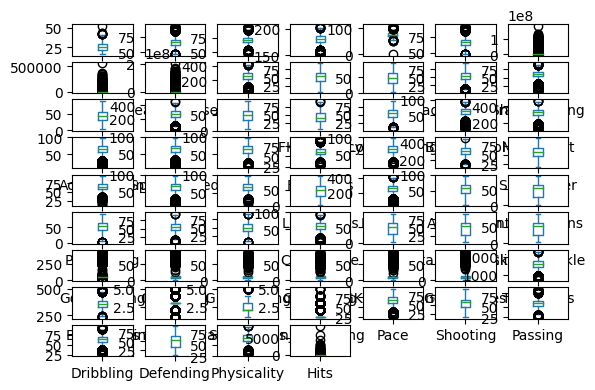

In [112]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [113]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [114]:
df1.shape

(18979, 89)

In [115]:
sample_outliers = detect_outliers_iqr(df1['Release Clause(K)'])
df1.drop(df1[df1['Release Clause(K)'].isin(sample_outliers)].index, inplace=True)

In [116]:
df1.shape

(16322, 89)

<Figure size 1600x2000 with 0 Axes>

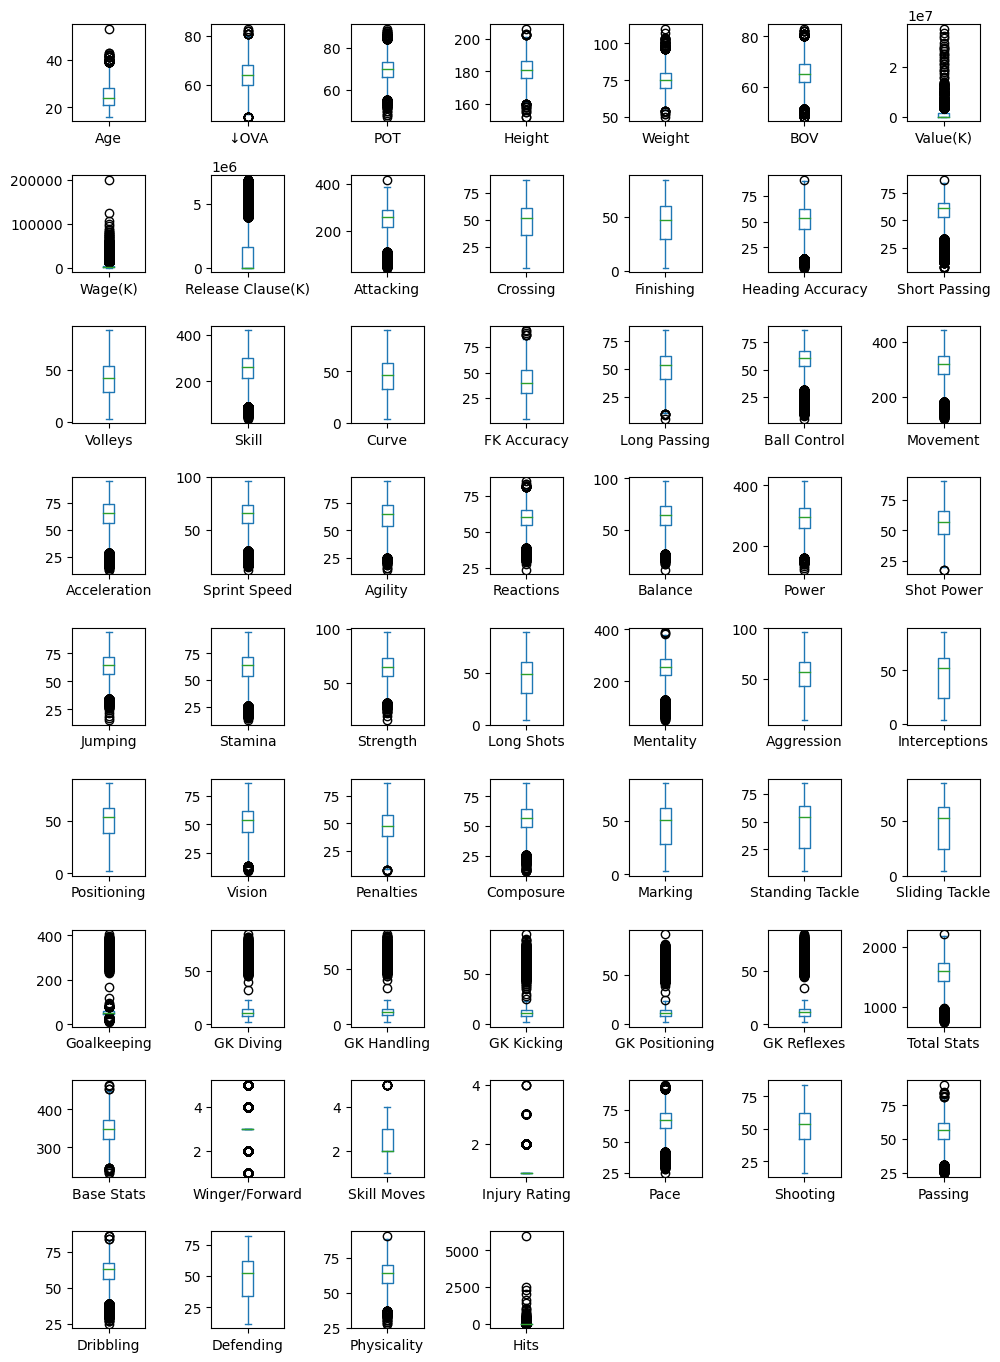

In [117]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [118]:
sample_outliers = detect_outliers_iqr(df1['Value(K)'])
df1.drop(df1[df1['Value(K)'].isin(sample_outliers)].index, inplace=True)

In [119]:
df1.shape

(15979, 89)

<Figure size 1600x2000 with 0 Axes>

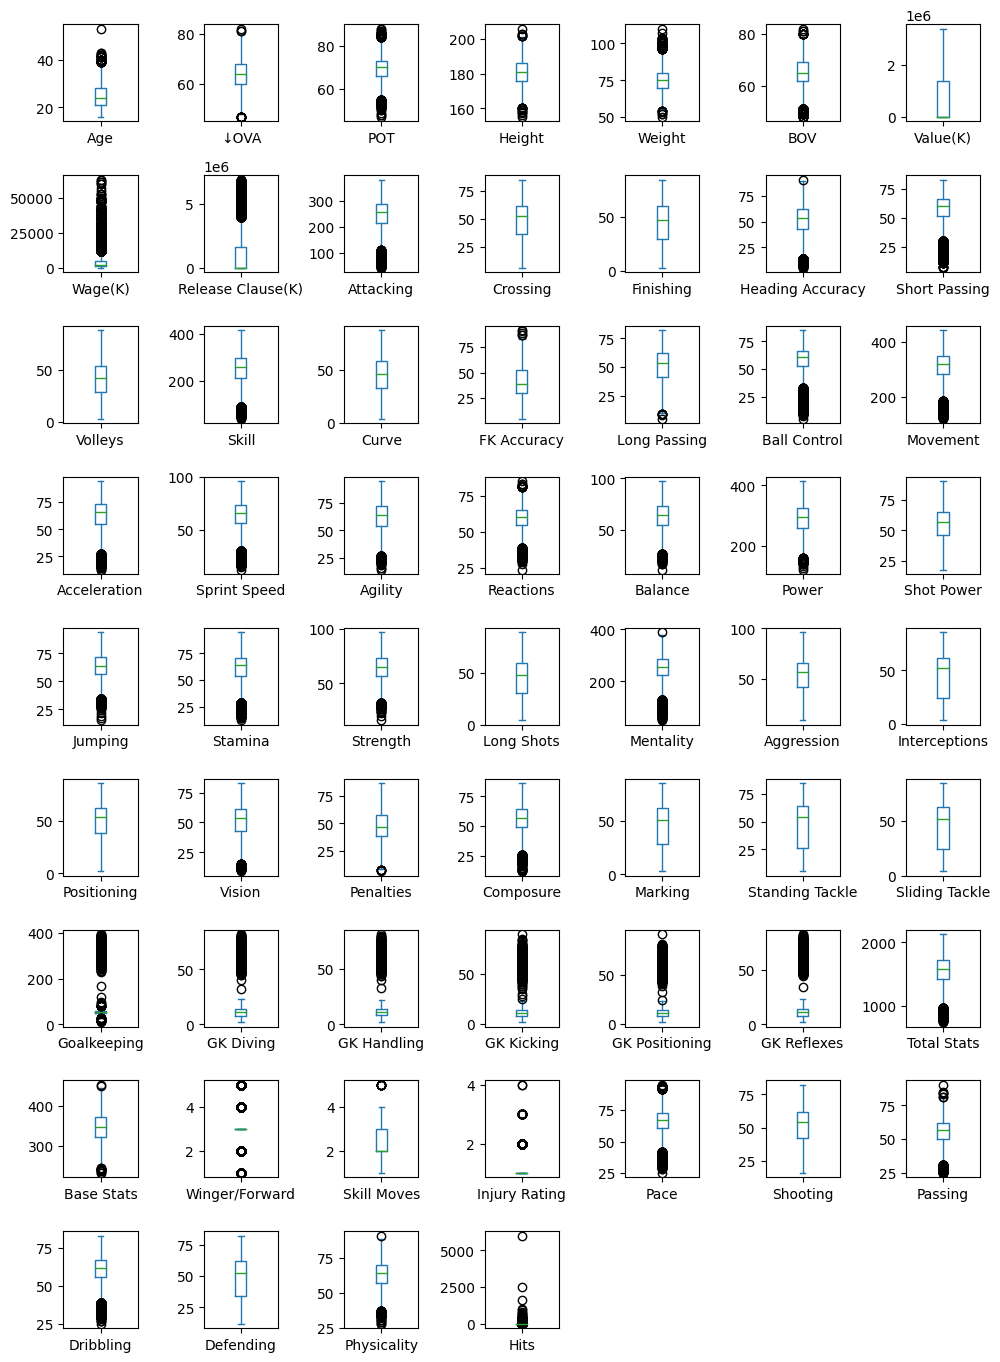

In [120]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [121]:
sample_outliers = detect_outliers_iqr(df1['GK Kicking'])
df1.drop(df1[df1['GK Kicking'].isin(sample_outliers)].index, inplace=True)

In [122]:
df1.shape

(14116, 89)

<Figure size 1600x2000 with 0 Axes>

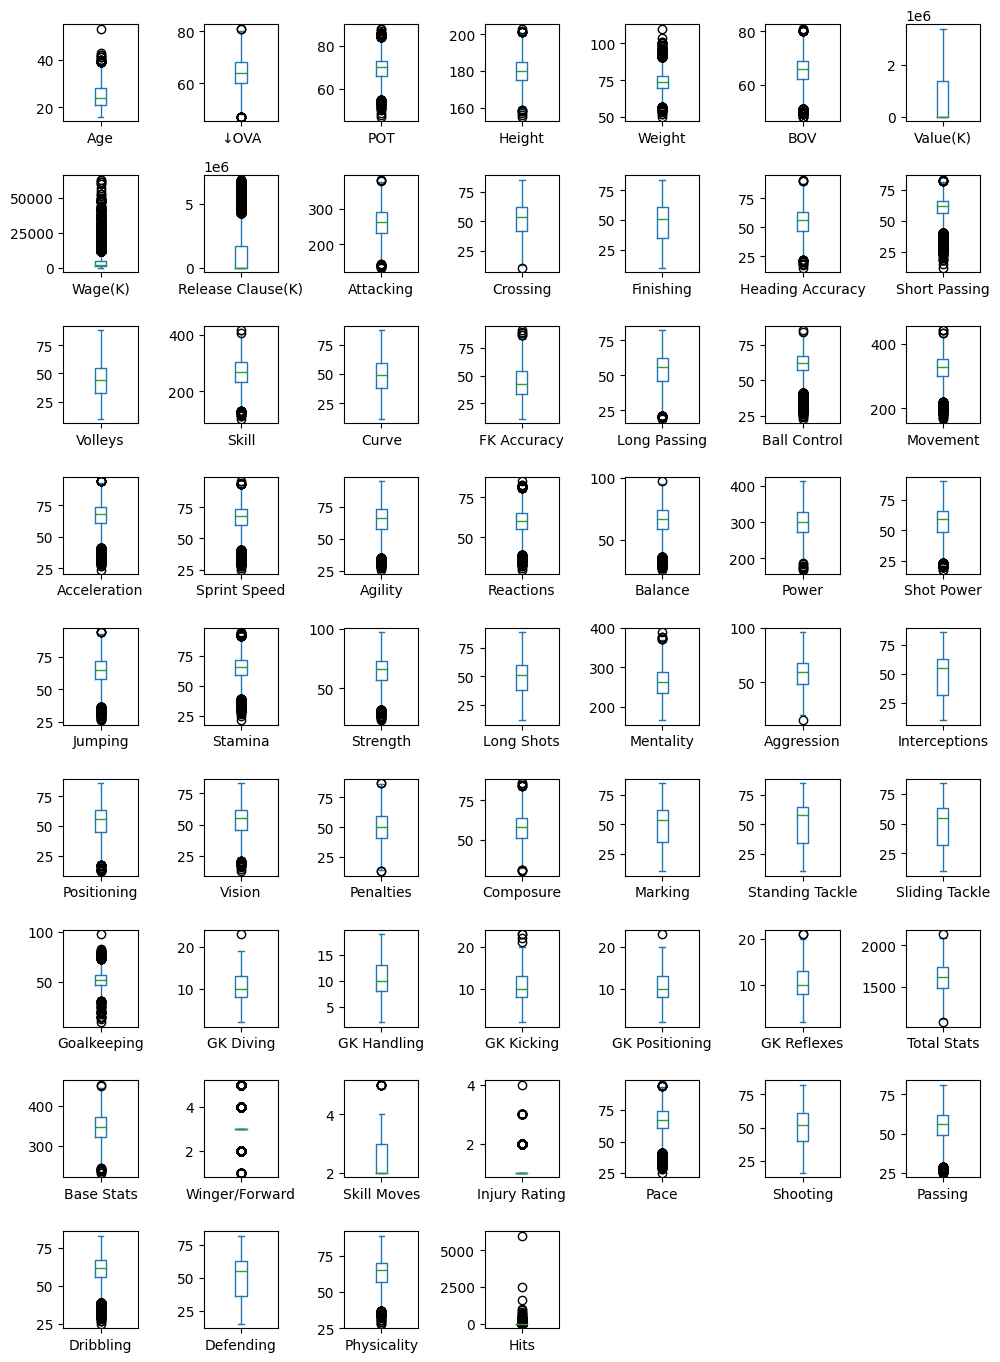

In [123]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [124]:
sample_outliers = detect_outliers_iqr(df1['Wage(K)'])
df1.drop(df1[df1['Wage(K)'].isin(sample_outliers)].index, inplace=True)

In [125]:
df1.shape

(12915, 89)

<Figure size 1600x2000 with 0 Axes>

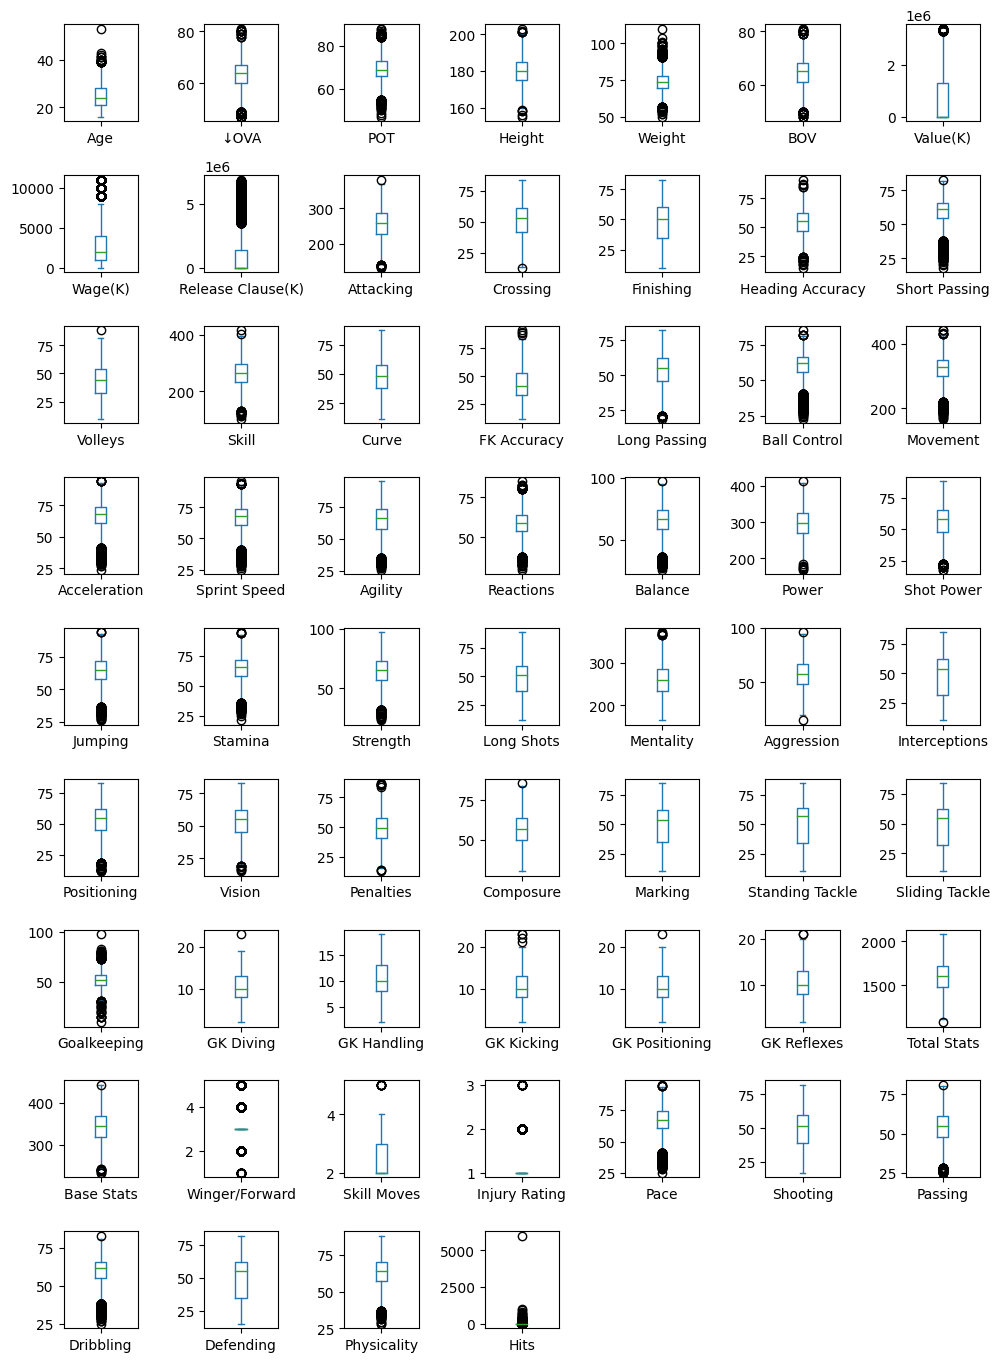

In [126]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [127]:
sample_outliers = detect_outliers_iqr(df1['Hits'])
df1.drop(df1[df1['Hits'].isin(sample_outliers)].index, inplace=True)

In [128]:
df1.shape

(11559, 89)

<Figure size 1600x2000 with 0 Axes>

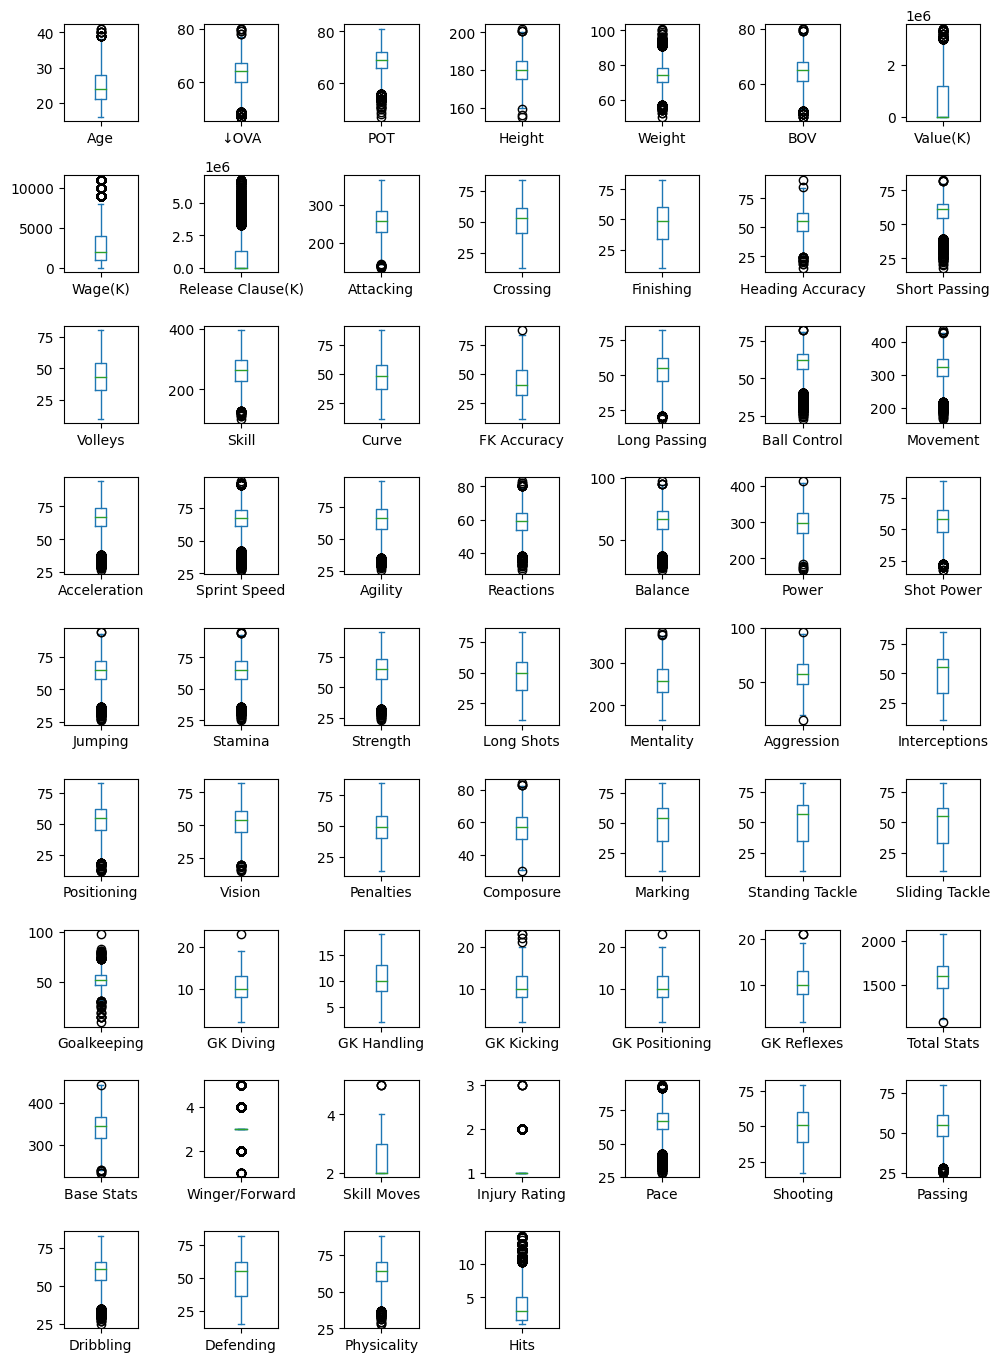

In [129]:
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi = 80)
df1.plot(kind='box', subplots=True, layout=(10,7), sharex=False, sharey=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

In [130]:
num_type = df1.select_dtypes('number').columns
df1[num_type].skew().to_dict()

{'Age': 0.4117081591099255,
 '↓OVA': -0.48307903068543656,
 'POT': -0.25316747917993815,
 'Height': -0.024835319003283264,
 'Weight': 0.1506607965709776,
 'BOV': -0.4854209739533415,
 'Value(K)': 1.2299880877927252,
 'Wage(K)': 1.3433403231691263,
 'Release Clause(K)': 2.035334135937716,
 'Attacking': -0.1908812577541219,
 'Crossing': -0.40687700657919307,
 'Finishing': -0.24742876076634715,
 'Heading Accuracy': -0.18481556142142264,
 'Short Passing': -0.9107436822215818,
 'Volleys': 0.10371254425785517,
 'Skill': -0.25630469518992477,
 'Curve': 0.051776195947394556,
 'FK Accuracy': 0.48288299973652404,
 'Long Passing': -0.5789840738850562,
 'Ball Control': -0.9668620869518646,
 'Movement': -0.41537826187883936,
 'Acceleration': -0.5789944662948181,
 'Sprint Speed': -0.5815224528925821,
 'Agility': -0.42170702013220485,
 'Reactions': -0.33383710940831157,
 'Balance': -0.47904145610819926,
 'Power': -0.09166254283571099,
 'Shot Power': -0.4731060917362069,
 'Jumping': -0.360347033804374

In [131]:
df1[num_type]  = np.log1p(df1[num_type])

In [132]:
df1[num_type].skew().to_dict()

{'Age': 0.08809560623466474,
 '↓OVA': -0.6931332810309027,
 'POT': -0.4707691816113101,
 'Height': -0.11940377823114107,
 'Weight': -0.11529929076753062,
 'BOV': -0.6846174013540016,
 'Value(K)': 0.5789807753360499,
 'Wage(K)': -2.622683105048174,
 'Release Clause(K)': 0.16500639944415108,
 'Attacking': -0.6002083259732228,
 'Crossing': -0.9131058978795596,
 'Finishing': -0.7549686616201087,
 'Heading Accuracy': -0.7076538610037775,
 'Short Passing': -1.5883900709169771,
 'Volleys': -0.46822305017289256,
 'Skill': -0.7754831425708856,
 'Curve': -0.5292486086636191,
 'FK Accuracy': -0.08653935456228737,
 'Long Passing': -1.122687550350463,
 'Ball Control': -1.573270372905122,
 'Movement': -0.8453443497691775,
 'Acceleration': -1.3039471145280817,
 'Sprint Speed': -1.3146811592065055,
 'Agility': -1.0469459171229083,
 'Reactions': -0.7439767034735615,
 'Balance': -1.1472574904792687,
 'Power': -0.3867071505688992,
 'Shot Power': -1.0717333631502244,
 'Jumping': -1.0260401119140532,
 'Sta

## Data Preprocessing
### Encoding

In [133]:
df1.columns

Index(['Age', '↓OVA', 'POT', 'Height', 'Weight', 'BOV', 'Value(K)', 'Wage(K)',
       'Release Clause(K)', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'Winger/Forward', 'Skill Moves', 'Injury Rating', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Hits',
       'Nationality', 'Club', 'Preferred Foot', 'Best Position',
       'Attacking Wing-back', 'Defensive Wing-back', 'PlayerName'

In [134]:
df1.select_dtypes('object').columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Best Position',
       'Attacking Wing-back', 'Defensive Wing-back', 'PlayerName',
       'Player Status', 'Height_cate(CM)', 'Weight_cate(KG)',
       'Wage_category(K)', 'Value_category(M)', 'Release Clause_Category(M)'],
      dtype='object')

In [135]:
for i in df1.select_dtypes('object').columns:
    print(i, df1[i].unique())


Nationality ['Uruguay' 'Russia' 'Ecuador' 'Spain' 'Egypt' 'Togo' 'Colombia' 'Italy'
 'Argentina' 'Cuba' 'Germany' 'Brazil' 'Serbia' 'Sweden' 'Czech Republic'
 'South Africa' 'Hungary' 'Portugal' 'Slovenia' 'Romania' 'France'
 'Morocco' 'Albania' 'Paraguay' 'Norway' 'Ukraine' 'Korea Republic'
 'Canada' 'Madagascar' 'Chile' 'Iceland' 'Sierra Leone' 'Algeria'
 'United States' 'Turkey' 'Zambia' 'Poland' 'Croatia' 'Greece' 'Japan'
 'Austria' 'Ghana' 'Mexico' 'Australia' 'Belgium' 'Georgia' 'Senegal'
 'Iran' 'Luxembourg' 'DR Congo' 'Scotland' 'Ivory Coast'
 'Trinidad & Tobago' 'Slovakia' 'Netherlands' 'Switzerland'
 'Bosnia Herzegovina' 'Montenegro' 'Cameroon' 'Venezuela' 'Finland'
 'Cape Verde' 'Denmark' 'England' 'Zimbabwe' 'Nigeria' 'Libya'
 'New Caledonia' 'Puerto Rico' 'United Arab Emirates' 'Guinea' 'Mali'
 'Bolivia' 'China PR' 'Iraq' 'Congo' 'Honduras' 'Kosovo' 'Kazakhstan'
 'Panama' 'Peru' 'Bulgaria' 'Jamaica' 'Gambia' 'Comoros' 'Israel'
 'Tunisia' 'Republic of Ireland' 'New Zealand'

In [136]:
Norminal = ['Nationality','Club','Best Position', 'PlayerName', 'Player Status' ]
Ordinal = ['Attacking Wing-back', 'Defensive Wing-back', 'Height_cate(CM)', 'Weight_cate(KG)']
Binary = ['ST', 'RW', 'CDM', 'LW', 'CB', 'LWB', 'GK', 'CAM', 'CF', 'RB', 'LM',
       'CM', 'LB', 'RM', 'RWB']

In [137]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected columns
df1[Ordinal] = ordinal_encoder.fit_transform(df1[Ordinal])


In [138]:
df1[Ordinal]

,Attacking Wing-back,Defensive Wing-back,Height_cate(CM),Weight_cate(KG)
369,0.0,2.0,3.0,5.0
376,0.0,0.0,2.0,4.0
377,2.0,2.0,2.0,3.0
508,0.0,2.0,2.0,3.0
510,0.0,2.0,1.0,3.0
...,...,...,...,...
19016,2.0,2.0,2.0,3.0
19017,2.0,2.0,2.0,3.0
19018,2.0,2.0,2.0,4.0
19019,2.0,2.0,2.0,3.0


In [139]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for column in Norminal:
    df1[column] = label_encoder.fit_transform(df1[column])

In [140]:
df1[Norminal]

,Nationality,Club,Best Position,PlayerName,Player Status
369,151,410,1,4695,1
376,151,410,2,7513,1
377,151,410,0,9803,1
508,151,410,2,3128,1
510,151,410,5,2880,1
...,...,...,...,...,...
19016,27,652,1,1037,0
19017,44,420,0,1264,0
19018,44,187,0,9471,0
19019,27,176,13,11467,0


In [141]:
# Initialize the Binarizer
binarizer = LabelBinarizer()
df1[Binary] = binarizer.fit_transform(df1[Binary])
# Binarize the "Preferred Foot" column
df1['Preferred Foot'] = binarizer.fit_transform(df1['Preferred Foot'])

In [142]:
df1[Binary]

,ST,RW,CDM,LW,CB,LWB,GK,CAM,CF,RB,LM,CM,LB,RM,RWB
369,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
376,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
377,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
508,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
510,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19017,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19018,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
df1['Joined'].min()

Timestamp('2002-01-01 00:00:00')

In [144]:
# Define the reference date
import datetime
reference_date = datetime.datetime(2002, 1, 1)

# Calculate the elapsed time in days
df1['Elapsed_Days'] = (df1['Joined'] - reference_date).dt.days


In [145]:
df1['Elapsed_Days']

369      6065
376      6065
377      6065
508      6065
510      6065
         ... 
19016    6037
19017    6787
19018    6275
19019    6839
19020    6418
Name: Elapsed_Days, Length: 11559, dtype: int64

In [146]:
df1.drop(columns = ['Wage_category(K)', 'Value_category(M)',
       'Release Clause_Category(M)', 'Joined'], inplace = True)

In [147]:
df1

,Age,↓OVA,POT,Height,Weight,BOV,Value(K),Wage(K),Release Clause(K),Attacking,...,CF,GK,RW,CB,RM,CDM,RB,LB,ST,Elapsed_Days
369,3.610918,4.394449,4.394449,5.204007,4.418841,4.394449,0.000000,0.000000,0.000000,5.726848,...,0,0,0,1,0,1,0,0,0,6065
376,3.610918,4.394449,4.394449,5.181784,4.330733,4.394449,0.000000,0.000000,0.000000,5.796058,...,0,0,0,0,0,1,0,0,0,6065
377,3.496508,4.394449,4.394449,5.147494,4.158883,4.394449,0.000000,0.000000,0.000000,5.817111,...,0,0,0,0,0,0,0,0,0,6065
508,3.496508,4.382027,4.382027,5.170484,4.262680,4.382027,0.000000,0.000000,0.000000,5.774552,...,0,0,0,0,0,1,0,0,0,6065
510,3.496508,4.382027,4.382027,5.129899,4.189655,4.382027,0.000000,0.000000,0.000000,5.752573,...,0,0,0,0,0,0,0,1,0,6065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,3.091042,3.871201,4.025352,5.187386,4.204693,3.912023,4.615121,6.908755,4.262680,4.983607,...,0,0,0,1,0,0,0,0,0,6037
19017,2.890372,3.871201,4.219508,5.170484,4.189655,3.951244,4.875197,6.216606,5.111988,5.356586,...,0,0,0,0,0,0,0,0,0,6787
19018,2.944439,3.871201,4.189655,5.192957,4.317488,3.912023,4.795791,6.216606,4.882802,5.303305,...,0,0,0,0,0,0,0,0,0,6275
19019,3.044522,3.871201,4.060443,5.170484,4.248495,3.891820,4.615121,7.601402,4.488636,5.375278,...,0,0,1,0,0,0,0,0,0,6839


In [148]:
feature = [f for f in df1.columns if f != 'Hits']
target =  [t for t in df1.columns if t == 'Hits']

In [149]:
X = df1[feature].values
X

array([[3.61091791e+00, 4.39444915e+00, 4.39444915e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.06500000e+03],
       [3.61091791e+00, 4.39444915e+00, 4.39444915e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.06500000e+03],
       [3.49650756e+00, 4.39444915e+00, 4.39444915e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.06500000e+03],
       ...,
       [2.94443898e+00, 3.87120101e+00, 4.18965474e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.27500000e+03],
       [3.04452244e+00, 3.87120101e+00, 4.06044301e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.83900000e+03],
       [3.09104245e+00, 3.87120101e+00, 4.06044301e+00, ...,
        1.00000000e+00, 0.00000000e+00, 6.41800000e+03]])

In [150]:
y = df1[target].values
y

array([[2.48490665],
       [2.56494936],
       [2.48490665],
       ...,
       [0.69314718],
       [0.95551145],
       [0.95551145]])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.20, random_state=7)

In [152]:
X_train_df = pd.DataFrame(X_train, columns=feature)
X_train_df

,Age,↓OVA,POT,Height,Weight,BOV,Value(K),Wage(K),Release Clause(K),Attacking,...,CF,GK,RW,CB,RM,CDM,RB,LB,ST,Elapsed_Days
0,3.044522,4.043051,4.276666,5.231109,4.304065,4.077537,5.786897,6.216606,5.929589,5.117994,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6110.0
1,3.367296,4.290459,4.290459,5.214936,4.442651,4.304065,14.648420,8.853808,15.176487,5.786897,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5876.0
2,3.367296,4.234107,4.234107,5.198497,4.465908,4.234107,13.910822,8.699681,14.285515,5.590987,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6240.0
3,3.295837,4.158883,4.189655,5.283204,4.442651,4.189655,6.265301,8.006701,6.274762,5.472271,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6390.0
4,3.135494,4.204693,4.330733,5.198497,4.290459,4.204693,14.403298,6.908755,14.077876,5.488938,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,3.367296,4.189655,4.189655,5.209486,4.343805,4.189655,6.439350,7.601402,6.536692,5.463832,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5660.0
9243,3.178054,4.174387,4.248495,5.209486,4.219508,4.174387,6.716595,7.601402,6.687109,5.356586,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5295.0
9244,2.890372,4.007333,4.290459,5.273000,4.477337,4.043051,5.525453,6.216606,5.501258,5.225747,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6299.0
9245,3.367296,4.276666,4.276666,5.247024,4.418841,4.276666,14.457365,9.305741,15.201805,5.771441,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6815.0


In [153]:
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9247.0,3.237896,0.178223,2.833213,3.091042,3.218876,3.367296,3.737670
↓OVA,9247.0,4.153968,0.085085,3.871201,4.110874,4.174387,4.219508,4.394449
POT,9247.0,4.241295,0.066477,3.891820,4.204693,4.248495,4.290459,4.406719
Height,9247.0,5.198877,0.035783,5.049856,5.170484,5.198497,5.225747,5.313206
Weight,9247.0,4.312385,0.087833,3.931826,4.262680,4.317488,4.369448,4.624973
...,...,...,...,...,...,...,...,...
CDM,9247.0,0.168055,0.373935,0.000000,0.000000,0.000000,0.000000,1.000000
RB,9247.0,0.125879,0.331731,0.000000,0.000000,0.000000,0.000000,1.000000
LB,9247.0,0.119390,0.324264,0.000000,0.000000,0.000000,0.000000,1.000000
ST,9247.0,0.190873,0.393010,0.000000,0.000000,0.000000,0.000000,1.000000


In [154]:
#initiation
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train_df)
R_Xtrain_df = scaler.transform(X_train_df)
R_Xtest_df = scaler.transform(X_test)

In [155]:
R_Xtrain_df = pd.DataFrame(R_Xtrain_df, columns = feature)
R_Xtrain_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9247.0,0.447432,0.197050,0.0,0.285065,0.426403,0.590501,1.0
↓OVA,9247.0,0.540406,0.162610,0.0,0.458048,0.579431,0.665663,1.0
POT,9247.0,0.678726,0.129108,0.0,0.607638,0.692709,0.774208,1.0
Height,9247.0,0.565865,0.135877,0.0,0.458052,0.564424,0.667897,1.0
Weight,9247.0,0.549030,0.126717,0.0,0.477322,0.556393,0.631355,1.0
...,...,...,...,...,...,...,...,...
CDM,9247.0,0.168055,0.373935,0.0,0.000000,0.000000,0.000000,1.0
RB,9247.0,0.125879,0.331731,0.0,0.000000,0.000000,0.000000,1.0
LB,9247.0,0.119390,0.324264,0.0,0.000000,0.000000,0.000000,1.0
ST,9247.0,0.190873,0.393010,0.0,0.000000,0.000000,0.000000,1.0


In [156]:
#instantiate
scaler = Normalizer().fit(R_Xtrain_df)
NR_Xtrain_df = scaler.transform(R_Xtrain_df)
NR_Xtest_df = scaler.transform(R_Xtest_df)

In [157]:
NR_Xtrain_df = pd.DataFrame(NR_Xtrain_df, columns = feature)
NR_Xtrain_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9247.0,0.076966,0.032362,0.0,0.052211,0.075547,0.100759,0.209051
↓OVA,9247.0,0.092733,0.023769,0.0,0.081181,0.097612,0.109266,0.163947
POT,9247.0,0.118479,0.022832,0.0,0.102959,0.117703,0.134532,0.208114
Height,9247.0,0.099420,0.026403,0.0,0.080923,0.098162,0.116958,0.191273
Weight,9247.0,0.096195,0.023732,0.0,0.080031,0.095164,0.111465,0.200213
...,...,...,...,...,...,...,...,...
CDM,9247.0,0.028280,0.063132,0.0,0.000000,0.000000,0.000000,0.211789
RB,9247.0,0.021743,0.057532,0.0,0.000000,0.000000,0.000000,0.217081
LB,9247.0,0.020933,0.057103,0.0,0.000000,0.000000,0.000000,0.222755
ST,9247.0,0.033255,0.068747,0.0,0.000000,0.000000,0.000000,0.219655


In [158]:
NR_Xtest_df = pd.DataFrame(NR_Xtest_df, columns = feature)
NR_Xtest_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2312.0,0.077993,0.031599,0.000000,0.054275,0.077464,0.100865,0.184641
↓OVA,2312.0,0.093206,0.023678,0.000000,0.082447,0.098147,0.109452,0.147283
POT,2312.0,0.117933,0.023432,-0.008154,0.102374,0.116880,0.133325,0.209379
Height,2312.0,0.099903,0.026599,0.003990,0.081652,0.097999,0.117021,0.200624
Weight,2312.0,0.096653,0.024386,0.021042,0.080092,0.095908,0.112511,0.197498
...,...,...,...,...,...,...,...,...
CDM,2312.0,0.025755,0.060897,0.000000,0.000000,0.000000,0.000000,0.212445
RB,2312.0,0.020872,0.056326,0.000000,0.000000,0.000000,0.000000,0.211673
LB,2312.0,0.022903,0.059474,0.000000,0.000000,0.000000,0.000000,0.228553
ST,2312.0,0.034198,0.069487,0.000000,0.000000,0.000000,0.000000,0.219728


## Features Selection
### Multicolinearity

In [159]:
NR_Xtrain_df['Hits'] = y_train

In [160]:
NR_Xtrain_df.columns

Index(['Age', '↓OVA', 'POT', 'Height', 'Weight', 'BOV', 'Value(K)', 'Wage(K)',
       'Release Clause(K)', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'Winger/Forward', 'Skill Moves', 'Injury Rating', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
       'Nationality', 'Club', 'Preferred Foot', 'Best Position',
       'Attacking Wing-back', 'Defensive Wing-back', 'PlayerName',
      

In [161]:
remove_column = ['Interceptions','Mentality','Curve','Agility','Acceleration', 'Sprint Speed','Base Stats', 'Marking', 'Standing Tackle',
       'Sliding Tackle''↓OVA','Height_cate(cm)',
       'Weight_cate(kg)','DRI', 'DEF','PAS','PHY', 'SHO', 'PAC','Height','Skill', 'Dribbling']

In [162]:
skill = [ 'Heading Accuracy','Crossing', 'Stamina','Strength','Reactions', 'Balance','Power', 'Shot Power', 'Total Stats', 
      'Ball Control','Aggression', 'Defending', 'Positioning', 'Vision', 'Weight', 
       'Penalties', 'Composure', 'Preferred Foot','Volleys', 'Player Status','Winger/Forward', 'Skill Moves', 
         'Injury Rating', 'Nationality',  'GK', 'Elapsed_Days','Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 
         'GK Reflexes', 'Movement',
       'Attacking Wing-back','Defensive Wing-back','PlayerName', 'POT','BOV', 'Value(K)', 'Wage(K)', 'Age','Club',  'RM', 'ST', 'RB', 'LM', 'LW', 'CB', 'RWB', 'LWB', 
      'CAM', 'CM', 'CF', 'RW', 'LB', 'CDM','Hits']

<Axes: >

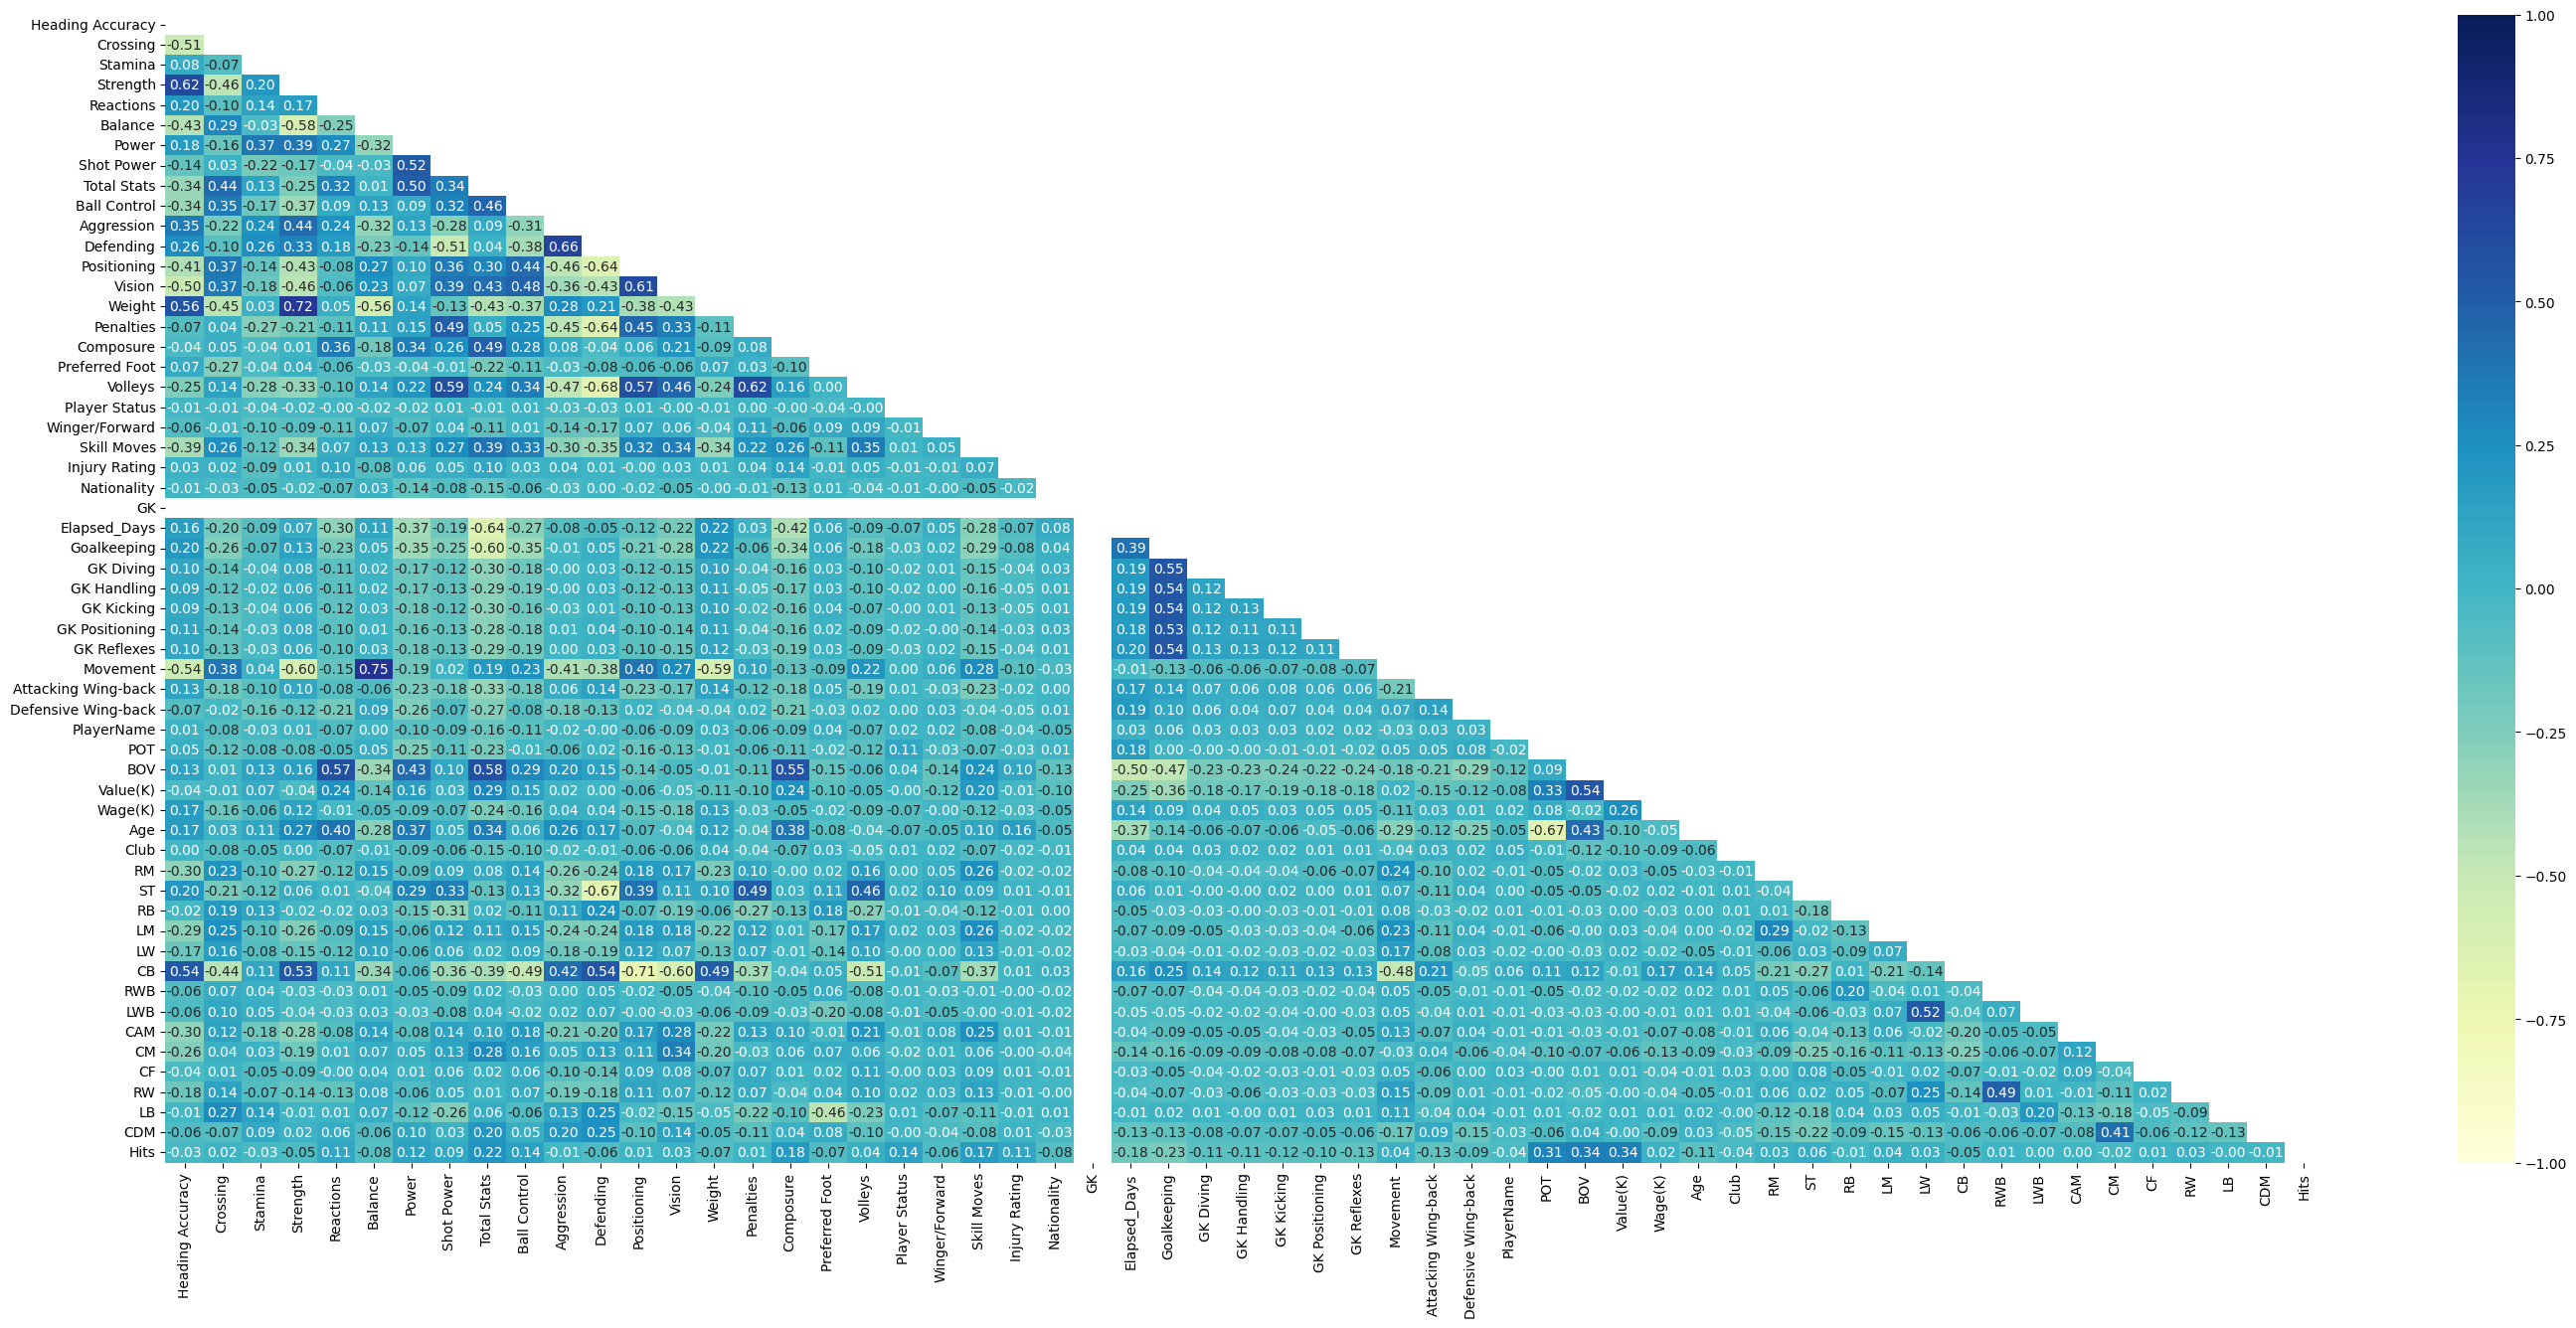

In [163]:
corr = NR_Xtrain_df[skill].corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [164]:
NR_Xtrain_df = NR_Xtrain_df[skill]
NR_Xtrain_df = NR_Xtrain_df.drop(columns = 'Hits')

In [165]:
NR_Xtrain_df.shape

(9247, 56)

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = NR_Xtrain_df.values
Y = y_train
model = LinearRegression() 
rfe = RFE(model, n_features_to_select=17)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False False False False  True False False False  True  True False  True
 False  True False False False False False  True False False  True False
 False False  True  True  True  True  True  True False False False False
  True  True False  True  True False False False False False False False
 False False False False False False False False]
[18  5 15 19  1  2  3 16  1  1 27  1  9  1  6  8 13 39  4  1 17  7  1 24
 40 14  1  1  1  1  1  1 23 22 20 38  1  1 12  1  1 35 32 10 28 26 34 33
 11 31 21 30 37 29 25 36]


In [167]:
RFE_ = [name for name, value in zip(NR_Xtrain_df.columns, fit.ranking_) if value == 1]
len(RFE_)

17

In [168]:
NR_Xtrain_df.columns

Index(['Heading Accuracy', 'Crossing', 'Stamina', 'Strength', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Total Stats', 'Ball Control',
       'Aggression', 'Defending', 'Positioning', 'Vision', 'Weight',
       'Penalties', 'Composure', 'Preferred Foot', 'Volleys', 'Player Status',
       'Winger/Forward', 'Skill Moves', 'Injury Rating', 'Nationality', 'GK',
       'Elapsed_Days', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Movement', 'Attacking Wing-back',
       'Defensive Wing-back', 'PlayerName', 'POT', 'BOV', 'Value(K)',
       'Wage(K)', 'Age', 'Club', 'RM', 'ST', 'RB', 'LM', 'LW', 'CB', 'RWB',
       'LWB', 'CAM', 'CM', 'CF', 'RW', 'LB', 'CDM'],
      dtype='object')

In [169]:
X_train = NR_Xtrain_df[RFE_].values

In [170]:
X_testdf = pd.DataFrame(NR_Xtest_df, columns = feature)
X_test = X_testdf[RFE_].values

In [171]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state= None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)

In [172]:
# Display results
for i in range(len(names)):
    print(f"{names[i]}: Mean MAE: {abs(results[i]).mean()}, Standard Deviation: {results[i].std()}")

LR: Mean MAE: 0.39799013918496523, Standard Deviation: 0.010203409937902154
Ridge: Mean MAE: 0.40342801129934164, Standard Deviation: 0.00947537851600335
Lasso: Mean MAE: 0.4700757677995789, Standard Deviation: 0.01126530137910874
KNN: Mean MAE: 0.4179315084610299, Standard Deviation: 0.011014556516748587
CART: Mean MAE: 0.5128603487221203, Standard Deviation: 0.021799699694176358
RF: Mean MAE: 0.3724416615171149, Standard Deviation: 0.00989758801774362
SVM: Mean MAE: 0.36560198272354977, Standard Deviation: 0.010265943760433794


In [173]:
#Instantiate
model = SVR()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)

In [174]:
mae = mean_absolute_error(y_test, y_predict)
mae

0.37687741898406085

In [175]:
y_test_predict_df = pd.DataFrame(y_test, columns = ['y_test'])

In [176]:
y_test_predict_df['y_predict'] = y_predict
y_test_predict_df.sample(30)

,y_test,y_predict
465,0.693147,1.405899
1123,0.693147,1.385927
512,1.386294,0.986907
1108,2.302585,2.154595
2116,2.451005,0.995840
2177,2.397895,1.228881
1357,0.693147,1.247318
1615,2.397895,1.938551
1368,0.693147,1.164920
2252,1.945910,1.679657


## Communicating Result

### Result deployment

In [177]:
def make_prediction(Reactions, Total_Stats, Ball_Control, Defending, Vision, Player_Status,Injury_Rating, Goalkeeping, GK_Diving,
GK_Handling, GK_Kicking, GK_Positioning, GK_Reflexes, POT, BOV, Wage, Age):
    data = {
        'Reactions' : Reactions,
        'Total Stats': Total_Stats,
        'Ball Control': Ball_Control, 
        'Defending' : Defending,
        'Vision': Vision,
        'Player Status': Player_Status,
        'Injury Rating': Injury_Rating,
        'Goalkeeping' :  Goalkeeping,
        'GK Diving': GK_Diving,
        'GK Handling': GK_Handling, 
        'GK Kicking' : GK_Kicking,
        'GK Positioning': GK_Positioning,
        'GK Reflexes': GK_Reflexes,
        'POT': POT,
        'BOV' : BOV,
        'Wage(K)': Wage,
        'Age': Age
        
    }
    df = pd.DataFrame(data, index = [0])
    prediction =model.predict(df).round(2)[0] 
    return f" hit that a player will make: {prediction}"

In [178]:
make_prediction(5, 1, 3, 777, 1144, 42, 13,8,9,80,12,65,12,45,21,13,14)

' hit that a player will make: 1.33'